In [1]:
def moving_average(x, z, windowsize = 1):
    
    def inner_function(xc):
        
        i = np.where(np.logical_and(x > (xc - windowsize / 2.0), x < (xc + windowsize / 2.0)))
        return np.mean(z[i])
    return inner_function

In [2]:
from EddyData import EddyData
import numpy as np

data = EddyData('data/HSL_data.csv')
data.filter_by_ustar(0.3)
data.denoise('co2_flux')
co2_ts = data.detrend('co2_flux')

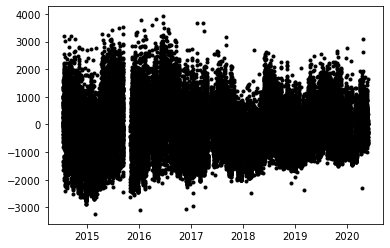

In [3]:
import matplotlib.pylab as plt
plt.plot(data.time,co2_ts,'k.')

In [4]:
co2_moving_average_function = moving_average(data.time,co2_ts, windowsize = np.timedelta64('180','D'))
co2_moving_average = np.zeros_like(data.co2_flux)
for index, t in enumerate(data.time):
    co2_moving_average[index] = co2_moving_average_function(t)

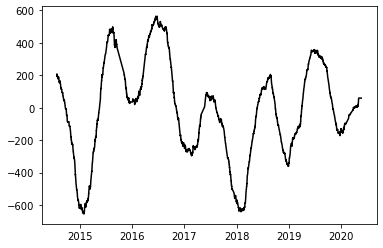

In [5]:
plt.plot(data.time,co2_moving_average,'k-')